In [2]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.decomposition import PCA
import sys
root = "/project/wyin/jlee/ml-project/"
util_loc = os.path.join(root, "utils")
data_loc = os.path.join(root, "dos-prediction-sparse/data/random")
sys.path.append(util_loc)
from forward_utilities import LitNeuralNet, DosDataModule, ScaledData, see_results

In [3]:
data = ScaledData(data_loc)
print(data.train_params.shape)

(10612, 3)


trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
trying n neights = 10
trying n neights = 11
trying n neights = 12
trying n neights = 13
trying n neights = 14
trying n neights = 15
trying n neights = 16
trying n neights = 17
trying n neights = 18
trying n neights = 19
0.00023732967514683467
3


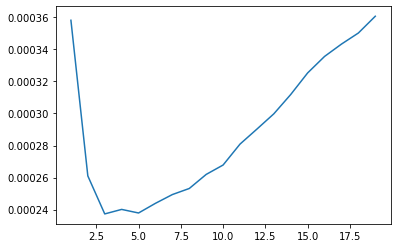

In [4]:
knn_mse_uniform = []
for i in range(1, 20):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(data.train_params, data.train_dos)
    predicted = neigh.predict(data.val_params)
    
    mse = np.mean((data.val_dos - predicted)**2)
    knn_mse_uniform.append(mse)

knn_mse_uniform = np.array(knn_mse_uniform)

plt.plot(np.arange(1, 20), knn_mse_uniform)
print(np.min(knn_mse_uniform))
print(np.argmin(knn_mse_uniform) + 1)

trying n neighs = 1
trying n neighs = 2
trying n neighs = 3
trying n neighs = 4
trying n neighs = 5
trying n neighs = 6
trying n neighs = 7
trying n neighs = 8
trying n neighs = 9
trying n neighs = 10
trying n neighs = 11
trying n neighs = 12
trying n neighs = 13
trying n neighs = 14
trying n neighs = 15
trying n neighs = 16
trying n neighs = 17
trying n neighs = 18
trying n neighs = 19
0.00018310318984261762
8


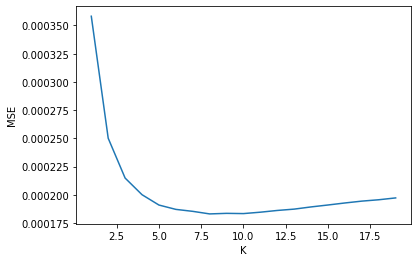

In [5]:
knn_mse_weighted = []
def WeightFunc(distances):
    return distances ** -3
for i in range(1, 20):
    print(f'trying n neighs = {i}')
    neigh = KNeighborsRegressor(n_neighbors = i, weights = WeightFunc)
    neigh.fit(data.train_params, data.train_dos)
    predicted = neigh.predict(data.val_params)
    
    mse = np.mean((data.val_dos - predicted)**2)
    knn_mse_weighted.append(mse)

knn_mse_weighted = np.array(knn_mse_weighted)

plt.plot(np.arange(1, 20), knn_mse_weighted)
plt.xlabel("K")
plt.ylabel("MSE")
print(np.min(knn_mse_weighted))
print(np.argmin(knn_mse_weighted) + 1)

model mse: 0.00021688101194231377


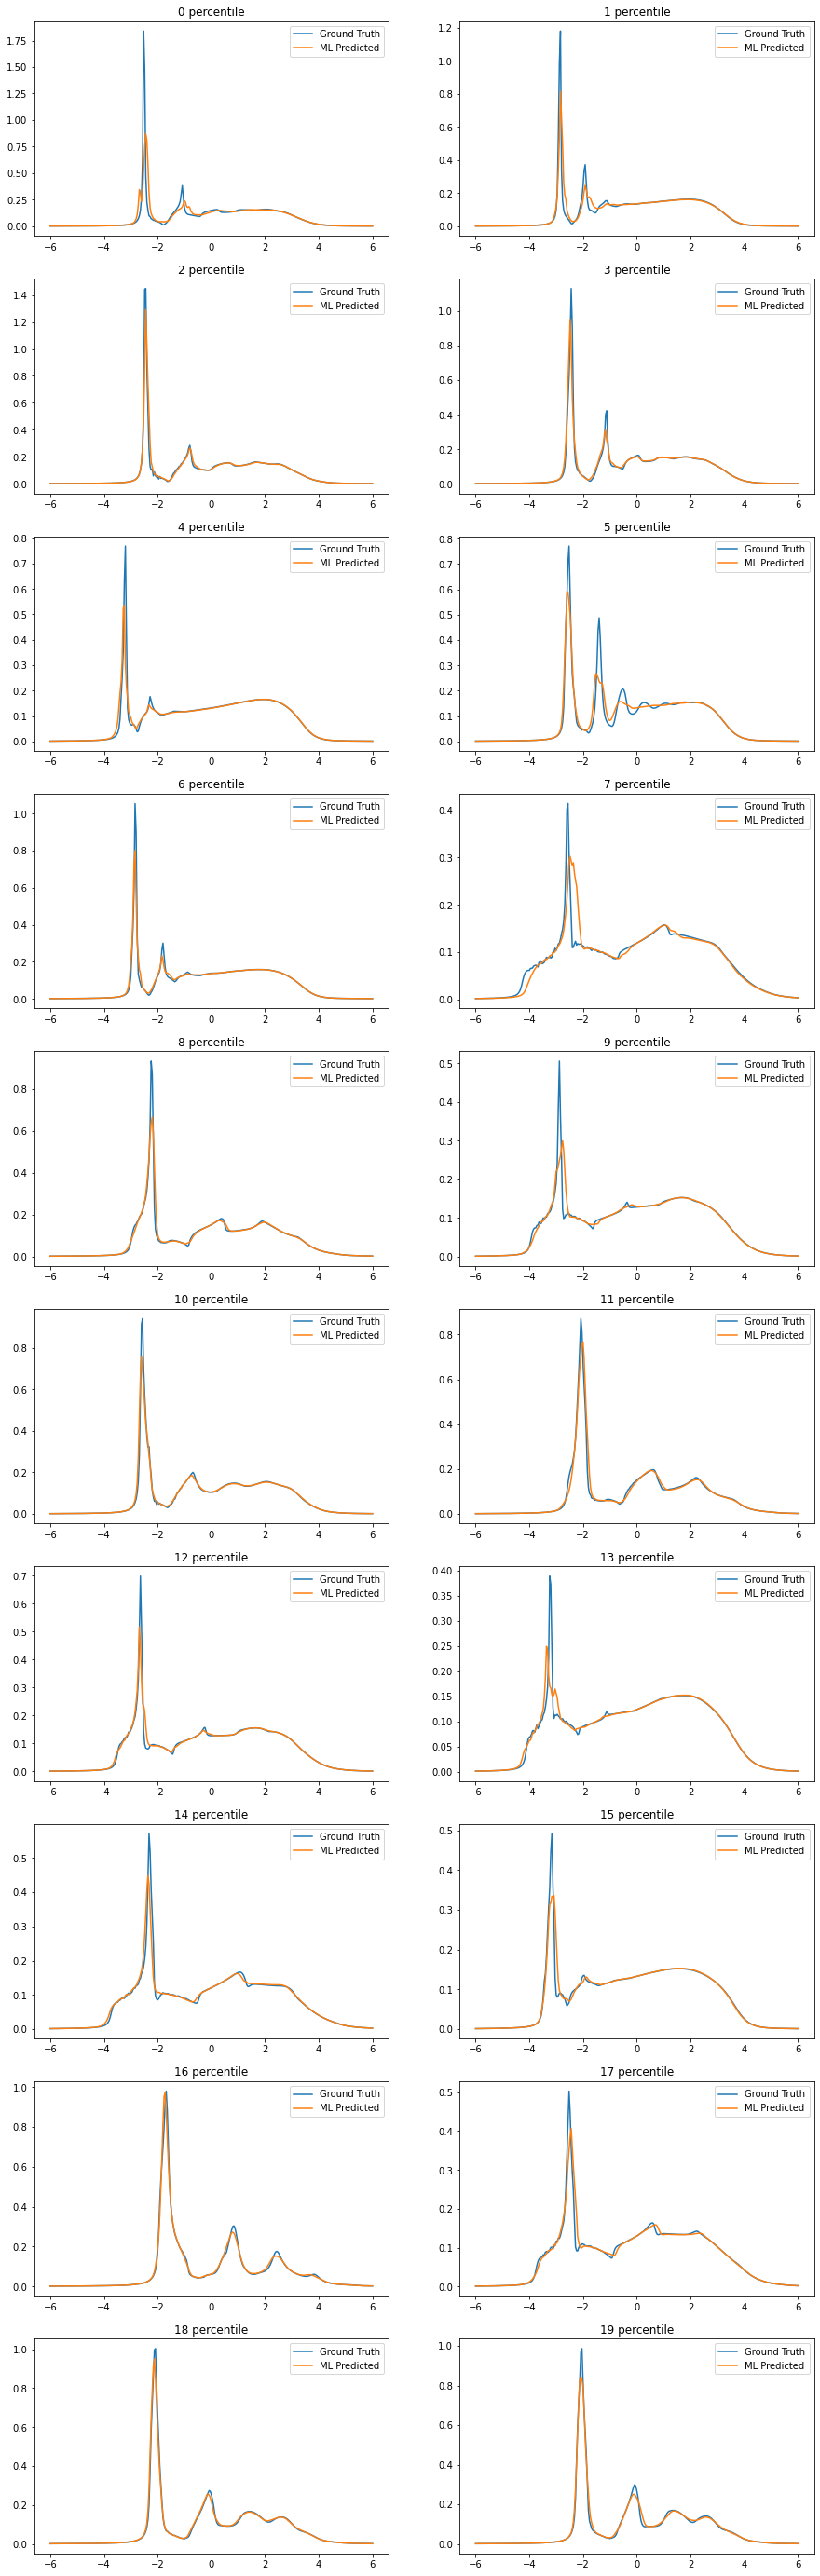

In [6]:
model = KNeighborsRegressor(n_neighbors = 8, weights = WeightFunc)
neigh.fit(data.train_params, data.train_dos)
predicted = neigh.predict(data.test_params)
see_results(predicted, data.test_dos, (10, 2), np.arange(0, 20, 1), False)